In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

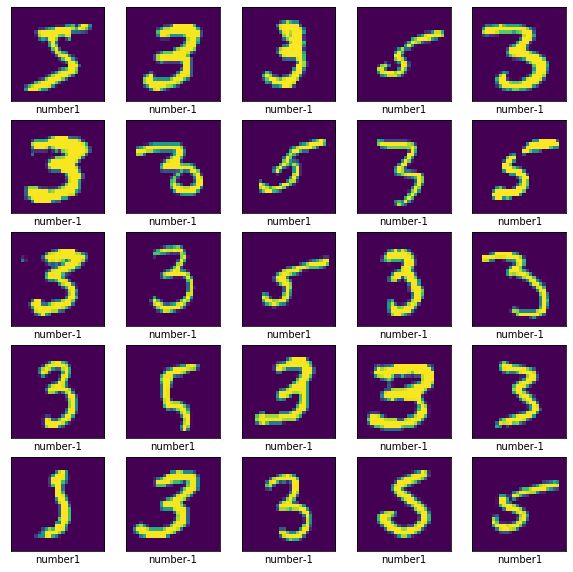

(11552, 785)
(1902, 785)


In [0]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

#choose pictures of number 3 and number 5
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # include all numbers from 0 to 9
index_train = np.where((train_labels==3)|(train_labels==5)) #index of numbers 3 and 5 in training data 
index_test = np.where((test_labels==3)|(test_labels==5)) #index of numbers 3 and 5 in test data 
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35),train_images_35[1].size))

#label of number 3: -1; label of number 5: +1
train_labels_35=train_labels[index_train].astype('int')
test_images_35=test_images[index_test]
test_images_35=test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35=test_labels[index_test].astype('int')

#change labels from '3' and '5' to '-1' and '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

#show the first 25 training data
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_35[i].reshape((28,28)))
    plt.xlabel('number'+ str(train_labels_35[i]))
plt.show()

#append dummy feature 1 to feature vectors, and then normalize
train_images_35_w_dummy=np.insert(train_images_35, 784,1,axis=1)/255
test_images_35_w_dummy=np.insert(test_images_35, 784,1,axis=1)/255

#check the dimension, the feature vector of each sample shall be 785
print(train_images_35_w_dummy.shape)
print(test_images_35_w_dummy.shape)

> Label or Y = train_labels_35>  

> X = train_images_35_w_dummy

###### Initialize w and correct rate for 95% and 80%
* w_95 - weight for 95 %, Initialize to be 1
* w_80 - weight for 80 %, Initialize to be 1
* correct_rate_95 - correct rate for 95 %, Initialize to be 0
* correct_rate_80 - correct rate for 80 %, Initialize to be 0

In [0]:
# initial w
w = np.ones(train_images_35_w_dummy.shape[1])

In [0]:
correct_rate_95 = 0
correct_rate_80 = 0

# (a) Stopping criterion is that 95% of the training data are correctly classified

In [0]:
while (correct_rate_95 < 0.95):
    correct_95 = 0    # count the number of corrected prediction
    correct_rate_95 = 0
    for i in range(11552):
        if (w_95.dot(train_images_35_w_dummy[i]))*train_labels_35[i] <= 0:
            w_95 += 0.2*train_labels_35[i]*train_images_35_w_dummy[i]
            
    for i in range(11552):
        if (w_95.dot(train_images_35_w_dummy[i]))*train_labels_35[i] > 0:
            correct_95+=1
    correct_rate_95 = correct_95/11552

>Train_error 

In [0]:
train_error_95 = 0
for i in range(11552):
    if (w_95.dot(train_images_35_w_dummy[i]))*train_labels_35[i] < 0:
        train_error_95 += 1
print('train error is {a}%'.format(a = train_error_95/11552 * 100))
print('{a}% of the training data are correctly classified'.format(a = 100 - train_error_95/11552 * 100))

train error is 4.847645429362881%
95.15235457063712% of the training data are correctly classified


>Test_error

In [0]:
test_error_95 = 0
for i in range(1902):
    if (w_95.dot(test_images_35_w_dummy[i]))*test_labels_35[i] <= 0:
        test_error_95 += 1
print('test error is {a}%'.format(a = test_error_95/1902 * 100))
print('{a}% of the test data are correctly classified'.format(a = 100 - test_error_95/1902 * 100))

test error is 5.099894847528917%
94.90010515247108% of the test data are correctly classified


# (b) Stopping criterion is that 80% of the training data are correctly classified

In [0]:
while (correct_rate_80 < 0.8):
    correct_80 = 0
    correct_rate_80 = 0
    
    for i in range(11552):
        if (w_80.dot(train_images_35_w_dummy[i]))*train_labels_35[i] <= 0:
            w_80 += 0.2*train_labels_35[i]*train_images_35_w_dummy[i]
            
    for i in range(11552):
        if (w_80.dot(train_images_35_w_dummy[i]))*train_labels_35[i] > 0:
            correct_80+=1
             
    correct_rate_80 = correct_80/11552

   > Train_error

In [0]:
train_error_80 = 0
for i in range(11552):
    if (w_80.dot(train_images_35_w_dummy[i]))*train_labels_35[i] < 0:
        train_error_80 += 1
print('train error is {a}%'.format(a = train_error_80/11552 * 100))
print('{a}% of the training data are correctly classified'.format(a = 100 - train_error_80/11552 * 100))

train error is 4.847645429362881%
95.15235457063712% of the training data are correctly classified


   > Test_error

In [0]:
test_error_80 = 0
for i in range(1902):
    if (w_80.dot(train_images_35_w_dummy[i]))*train_labels_35[i] < 0:
        test_error_80 += 1
print('test error is {a}%'.format(a = test_error_80/1902 * 100))
print('{a}% of the test data are correctly classified'.format(a = 100 - test_error_80/1902 * 100))

test error is 4.73186119873817%
95.26813880126183% of the test data are correctly classified
